In [2]:
import os
import re
import string
import json
import pandas as pd
from openai import OpenAI
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import numpy as np

# Accuracy for new prompt and dataframe preprocessing

# Comparison between different models
1. Baseline with GPT 3.5 finetuned (ft:gpt-3.5-turbo-1106:ninjatech-ai-dev::8sQyzUKb)
2. Baseline with GPT 4
3. Prompt2Code with GPT3.5
4. Prompt2Code with GPT4
5. Prompt2Code with GPT3.5 self consistency

Success rate /n{'Baseline GPT3.5 Finetuned': 0.19999999999999998, 'Baseline GPT4': 0.3869565217391305, 'Code GPT3.5 Reflexion': 0.7119565217391305, 'Code GPT3.5 Self Consistency': 0.7478260869565218, 'Code GPT4 Prompt': 0.7391304347826086}
Execution rate /n{'Baseline GPT3.5 Finetuned': 1.0, 'Baseline GPT4': 1.0, 'Code GPT3.5 Reflexion': 0.9782608695652174, 'Code GPT3.5 Self Consistency': 1.0, 'Code GPT4 Prompt': 0.9565217391304348}


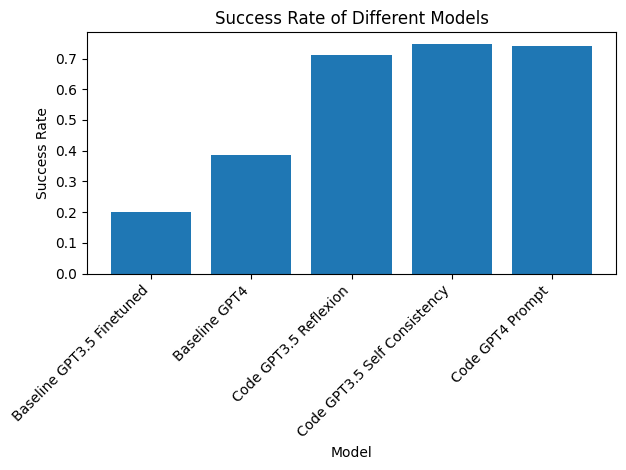

In [5]:

# Define the datasets - 5 times experiment

result_baseline_with_GPT3_5_finetuned = [
    {'success': 12, 'wrong_answer': 34, 'error': 0},
    {'success': 7, 'wrong_answer': 39, 'error': 0},
    {'success': 9, 'wrong_answer': 37, 'error': 0},
    {'success': 9, 'wrong_answer': 37, 'error': 0},
    {'success': 9, 'wrong_answer': 37, 'error': 0}
]

result_baseline_with_GPT4 = [
    {'success': 19, 'wrong_answer': 27, 'error': 0},
    {'success': 16, 'wrong_answer': 30, 'error': 0},
    {'success': 15, 'wrong_answer': 31, 'error': 0},
    {'success': 20, 'wrong_answer': 26, 'error': 0},
    {'success': 19, 'wrong_answer': 27, 'error': 0}
]

result_prompt_GPT3_5_reflexion = [
    {'success': 35, 'wrong_answer': 10, 'error': 1},
    {'success': 30, 'wrong_answer': 16, 'error': 0},
    {'success': 31, 'wrong_answer': 13, 'error': 2},
    {'success': 35, 'wrong_answer': 10, 'error': 1}  
]

result_prompt_GPT3_5_self_consistency = [
    {'success': 34, 'wrong_answer': 12, 'error': 0},
    {'success': 36, 'wrong_answer': 10, 'error': 0},
    {'success': 36, 'wrong_answer': 10, 'error': 0},
    {'success': 32, 'wrong_answer': 14, 'error': 0},
    {'success': 34, 'wrong_answer': 12, 'error': 0}
]


# 1 * 46
result_prompt_GPT4 = [
    # 74%
    {'success': 34, 'wrong_answer': 10, 'error': 2}
]


# Calculate average success rate and average error rate for each list
def calculate_average_rates(result_list):
    total_records = len(result_list)
    if total_records == 0:
        return 0, 0
    total_questions = sum(result_list[0].values())
    success_sum = sum(result['success'] for result in result_list)
    error_sum = sum(result['error'] for result in result_list)
    average_success_rate = success_sum / total_records/total_questions
    average_exec_rate = 1- error_sum / total_records/total_questions
    return average_success_rate, average_exec_rate

success_baseline_GPT3_5, execution_baseline_GPT3_5 = calculate_average_rates(result_baseline_with_GPT3_5_finetuned)
success_baseline_with_GPT4, execution_baseline_with_GPT4 = calculate_average_rates(result_baseline_with_GPT4)
success_code_GPT3_5_reflexion, execution_code_GPT3_5_reflexion = calculate_average_rates(result_prompt_GPT3_5_reflexion)
success_code_GPT3_5_self_consistency, execution_code_GPT3_5_self_consistency = calculate_average_rates(result_prompt_GPT3_5_self_consistency)
success_code_GPT4, execution_code_GPT4 = calculate_average_rates(result_prompt_GPT4)


# Calculate success rates for each model
success_rates = {
    "Baseline GPT3.5 Finetuned":        success_baseline_GPT3_5,
    "Baseline GPT4":                    success_baseline_with_GPT4,
    "Code GPT3.5 Reflexion":            success_code_GPT3_5_reflexion,
    "Code GPT3.5 Self Consistency":     success_code_GPT3_5_self_consistency,
    "Code GPT4 Prompt":                 success_code_GPT4
}

execution_rates = {
    "Baseline GPT3.5 Finetuned":        execution_baseline_GPT3_5,
    "Baseline GPT4":                    execution_baseline_with_GPT4,
    "Code GPT3.5 Reflexion":            execution_code_GPT3_5_reflexion,
    "Code GPT3.5 Self Consistency":     execution_code_GPT3_5_self_consistency,
    "Code GPT4 Prompt":                 execution_code_GPT4


}

print(f"""Success rate /n{success_rates}""")
print(f"""Execution rate /n{execution_rates}""")

# Plot the histogram
# , color=['blue', 'orange', 'green', 'red']
plt.bar(success_rates.keys(), success_rates.values())
plt.xlabel('Model')
plt.ylabel('Success Rate')
plt.title('Success Rate of Different Models')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# , color=['blue', 'orange', 'green', 'red']
# plt.bar(execution_rates.keys(), execution_rates.values())
# plt.xlabel('Model')
# plt.ylabel('Execution Rate')
# plt.title('Execution Rate of Different Models')
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
# plt.show()

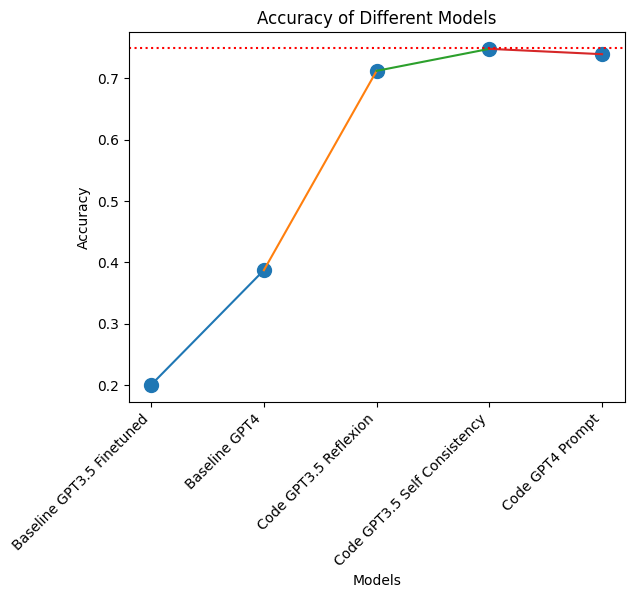

In [20]:
import matplotlib.pyplot as plt

# Sample data: model names and corresponding accuracies
# model_names = ['Model A', 'Model B', 'Model C', 'Model D']
# accuracies = [0.85, 0.78, 0.92, 0.81]  # Sample accuracy values

# # Assigning colors to dots based on accuracy
# colors = ['red' if acc < 0.8 else 'green' for acc in accuracies]

model_names = list(success_rates.keys())
accuracies = list(success_rates.values())

# Plotting the dots
plt.scatter(model_names, accuracies, s=100)

# Connecting dots with lines
for i in range(len(model_names)-1):
    plt.plot([model_names[i], model_names[i+1]], [accuracies[i], accuracies[i+1]])
# specifying horizontal line type 
# plt.axhline(0.75, color='r', linestyle=':') # horizontal
# plt.plot([], [], color='red', linestyle='--', linewidth=2)

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
# plt.title('Accuracy Analysis of Different Models')
plt.title('Accuracy of Different Models')
plt.xticks(rotation=45, ha='right')
# Showing the plot
plt.show()


In [6]:
def printTable(myDict, colList=None):
    # print a list of dict as a table
    if not colList: 
        colList = list(myDict[0].keys() if myDict else [])
    myList = [colList] # 1st row = header
    for item in myDict: 
        myList.append([str(item[col] or '') for col in colList])
    #maximun size of the col for each element
    colSize = [max(map(len,col)) for col in zip(*myList)]
    #insert seperating line before every line, and extra one for ending. 
    for i in  range(0, len(myList)+1)[::-1]:
         myList.insert(i, ['-' * i for i in colSize])
    #two format for each content line and each seperating line
    formatStr = ' | '.join(["{{:<{}}}".format(i) for i in colSize])
    formatSep = '-+-'.join(["{{:<{}}}".format(i) for i in colSize])
    for item in myList: 
        if item[0][0] == '-':
            print(formatSep.format(*item))
        else:
            print(formatStr.format(*item))
   
printTable([execution_rates])

--------------------------+---------------+-----------------------+------------------------------+-------------------
Baseline GPT3.5 Finetuned | Baseline GPT4 | Code GPT3.5 Reflexion | Code GPT3.5 Self Consistency | Code GPT4 Prompt  
--------------------------+---------------+-----------------------+------------------------------+-------------------
1.0                       | 1.0           | 0.9782608695652174    | 1.0                          | 0.9565217391304348
--------------------------+---------------+-----------------------+------------------------------+-------------------
